## Aula 1

In [ ]:
import pandas as pd
import numpy as np
from scipy import special

import itertools
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
fraude_df = pd.read_csv('Fraud_Data.csv')

In [ ]:
ip_df = pd.read_csv('IpAddress_to_Country.csv')

In [ ]:
fraude_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
ip_df.head()

,limite_inferior_ip,limite_superior_ip,pais
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              151112 non-null  int64  
 1   hora_registro   151112 non-null  object 
 2   hora_compra     151112 non-null  object 
 3   valor_compra    151112 non-null  int64  
 4   id_dispositivo  151112 non-null  object 
 5   fuente          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   genero          151112 non-null  object 
 8   edad            151112 non-null  int64  
 9   ip              151112 non-null  float64
 10  fraude          151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   limite_inferior_ip  138846 non-null  float64
 1   limite_superior_ip  138846 non-null  int64  
 2   pais                138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
ip_floats = ip_df.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()

In [ ]:
print("Casos de IPs con numero decimal diferente de 0:", ip_floats)

Casos de IPs con numero decimal diferente de 0: 0


In [ ]:
ip_df.limite_inferior_ip = ip_df.limite_inferior_ip.astype(int)

In [ ]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   limite_inferior_ip  138846 non-null  int64 
 1   limite_superior_ip  138846 non-null  int64 
 2   pais                138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


In [ ]:
fraude_df.hora_registro = pd.to_datetime(fraude_df.hora_registro)

In [ ]:
fraude_df.hora_compra = pd.to_datetime(fraude_df.hora_compra)

In [ ]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  float64       
 10  fraude          151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [ ]:
fraude_df.describe()

,id,valor_compra,edad,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [ ]:
ip_df.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [ ]:
fraude_df.ip = fraude_df.ip.astype(int)

In [ ]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  int64         
 10  fraude          151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


In [ ]:
def ip_por_pais(ip):
    try:
        return ip_df.pais[(ip_df.limite_inferior_ip < ip) & (ip_df.limite_superior_ip > ip)].iloc[0]
    except IndexError:
        return "Desconocido"

In [ ]:
fraude_df['ip_pais'] = fraude_df.ip.apply(ip_por_pais)

In [ ]:
fraude_df.head(30)

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3987484328,0,Desconocido
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3719094257,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States


In [ ]:
fraude_df.to_csv('Datos_fraude_con_pais.csv', index=False)

In [ ]:
base_df = pd.read_csv('Datos_fraude_con_pais.csv')

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


## Aula 2 - Análisis Exploratorio

In [ ]:
print("Porcentaje de casos de fraude: ", int(base_df['fraude'].mean() * 1000)/10, "%")

Porcentaje de casos de fraude:  9.3 %


In [ ]:
base_df.groupby(by = 'browser').mean()['fraude']

browser
Chrome     0.098792
FireFox    0.095165
IE         0.086775
Opera      0.089227
Safari     0.090201
Name: fraude, dtype: float64

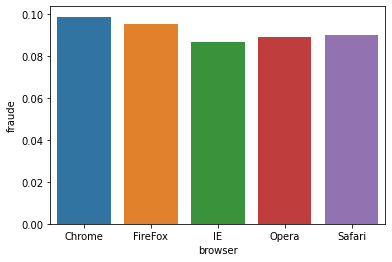

In [ ]:
sns.barplot(x= base_df.groupby(by = 'browser').mean()['fraude'].index
            , y= base_df.groupby(by = 'browser').mean()['fraude']
            , data=base_df)

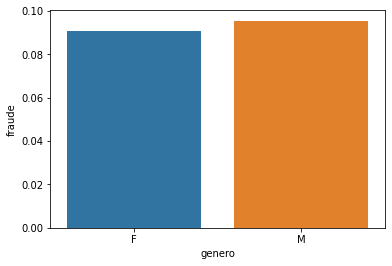

In [ ]:
sns.barplot(x= base_df.groupby(by = 'genero').mean()['fraude'].index
            , y= base_df.groupby(by = 'genero').mean()['fraude']
            , data=base_df)

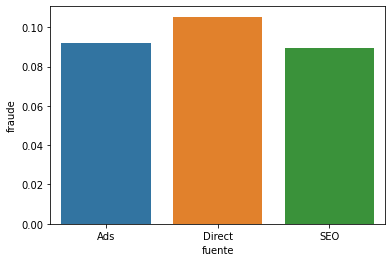

In [ ]:
sns.barplot(x= base_df.groupby(by = 'fuente').mean()['fraude'].index
            , y= base_df.groupby(by = 'fuente').mean()['fraude']
            , data=base_df)

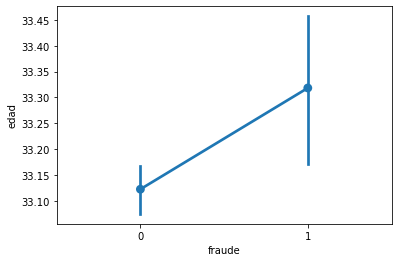

In [ ]:
sns.pointplot(x='fraude', y='edad', data=base_df)

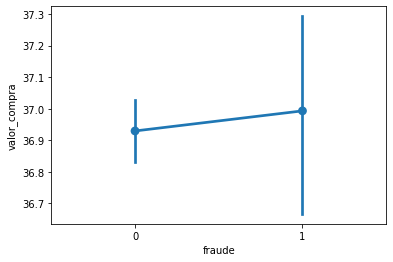

In [ ]:
sns.pointplot(x='fraude', y='valor_compra', data=base_df)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


### Análisis de ID_dispositivo e IP

In [ ]:
freq_df = pd.DataFrame(columns=('fraude', 'id_por_dispositivo', 'id_por_ip'))

In [ ]:
freq_df['fraude'] = base_df['fraude']

In [ ]:
contar_id_dispositivo = base_df.groupby(by='id_dispositivo').id.count()

In [ ]:
freq_df['id_por_dispositivo'] = base_df.id_dispositivo.apply(lambda x: contar_id_dispositivo[x])

In [ ]:
contar_id_ip = base_df.groupby(by='ip').id.count()

In [ ]:
freq_df['id_por_ip'] = base_df.ip.apply(lambda x: contar_id_ip[x])

In [ ]:
freq_df.head(10)

,fraude,id_por_dispositivo,id_por_ip
0,0,1,1
1,0,1,1
2,1,12,12
3,0,1,1
4,0,1,1
5,0,1,1
6,0,1,1
7,0,1,1
8,0,1,1
9,0,1,1


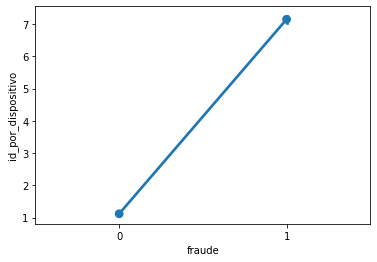

In [ ]:
sns.pointplot(x='fraude', y='id_por_dispositivo', data=freq_df)

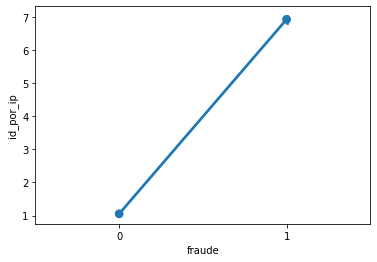

In [ ]:
sns.pointplot(x='fraude', y='id_por_ip', data=freq_df)

### Análisis IP_Pais

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


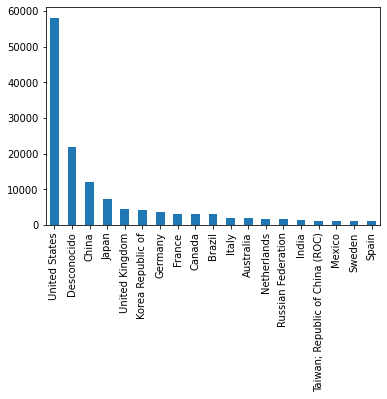

In [ ]:
base_df.ip_pais.value_counts()[base_df.ip_pais.value_counts() > 1000].plot(kind='bar')

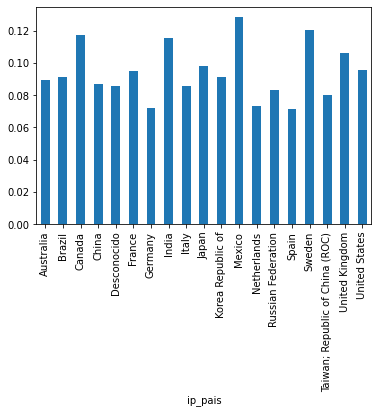

In [ ]:
base_df.groupby(by='ip_pais').mean()['fraude'][base_df.ip_pais.value_counts() > 1000].plot(kind='bar')

### Análisis Hora

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              151112 non-null  int64 
 1   hora_registro   151112 non-null  object
 2   hora_compra     151112 non-null  object
 3   valor_compra    151112 non-null  int64 
 4   id_dispositivo  151112 non-null  object
 5   fuente          151112 non-null  object
 6   browser         151112 non-null  object
 7   genero          151112 non-null  object
 8   edad            151112 non-null  int64 
 9   ip              151112 non-null  int64 
 10  fraude          151112 non-null  int64 
 11  ip_pais         151112 non-null  object
dtypes: int64(5), object(7)
memory usage: 13.8+ MB


In [ ]:
base_df['hora_registro'] = pd.to_datetime(base_df['hora_registro'])

In [ ]:
base_df['hora_compra'] = pd.to_datetime(base_df['hora_compra'])

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              151112 non-null  int64         
 1   hora_registro   151112 non-null  datetime64[ns]
 2   hora_compra     151112 non-null  datetime64[ns]
 3   valor_compra    151112 non-null  int64         
 4   id_dispositivo  151112 non-null  object        
 5   fuente          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   genero          151112 non-null  object        
 8   edad            151112 non-null  int64         
 9   ip              151112 non-null  int64         
 10  fraude          151112 non-null  int64         
 11  ip_pais         151112 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 13.8+ MB


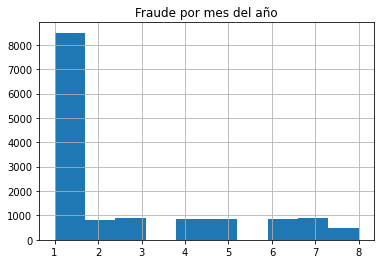

In [ ]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.month).hist() # Mês del año
plt.title('Fraude por mes del año');

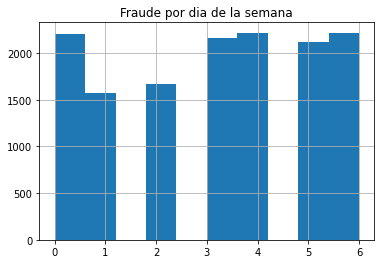

In [ ]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.dayofweek).hist()
plt.title('Fraude por dia de la semana');

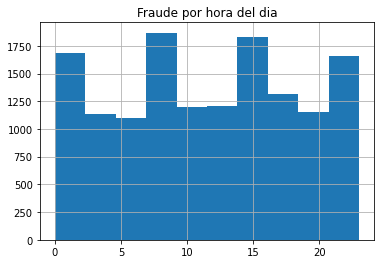

In [ ]:
base_df[base_df['fraude']==1].hora_registro.apply(lambda x: x.hour).hist()
plt.title('Fraude por hora del dia');

In [ ]:
freq_df['hora_registro'] = base_df['hora_registro']
freq_df['hora_compra'] = base_df['hora_compra']

In [ ]:
freq_df['tiempo_seg'] = (freq_df['hora_compra'] - freq_df['hora_registro']).apply(lambda x: x.seconds)

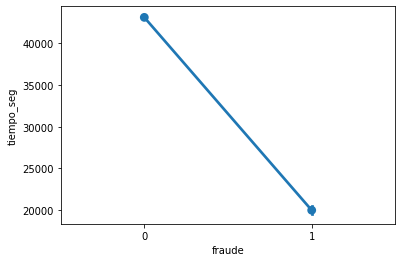

In [ ]:
sns.pointplot(x='fraude', y='tiempo_seg', data=freq_df)

## Aula 3

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


In [ ]:
contar_id_dispositivo = base_df.groupby(by='id_dispositivo').id.count()

In [ ]:
base_df['id_por_dispositivo'] = base_df.id_dispositivo.apply(lambda x: contar_id_dispositivo[x])

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1


In [ ]:
contar_id_ip = base_df.groupby(by = 'ip').id.count()

In [ ]:
base_df['id_por_ip'] = base_df.ip.apply(lambda x: contar_id_ip[x])

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,1


In [ ]:
base_df['ids'] = (base_df['id_por_dispositivo'] + base_df['id_por_ip']) / 2

In [ ]:
base_df['hora'] = base_df.hora_registro.apply(lambda x: x.hour)
base_df['dia'] = base_df.hora_registro.apply(lambda x: x.dayofweek)

In [ ]:
base_df['tiempo_seg'] = (base_df['hora_compra'] - base_df['hora_registro']).apply(lambda x: x.seconds)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,1.0,20,6,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Desconocido,1,1,1.0,21,1,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,1,1.0,7,1,41461


In [ ]:
base_df['compra_rapida'] = base_df['tiempo_seg'].apply(lambda x: 1 if x < 30 else 0)

In [ ]:
contar_paises = base_df.groupby(by=['id_dispositivo', 'ip_pais']).count().reset_index()

In [ ]:
contar_paises = pd.DataFrame(contar_paises.groupby(by = 'id_dispositivo').count().ip_pais)

In [ ]:
contar_paises[contar_paises['ip_pais']> 1]

,ip_pais
id_dispositivo,
AAFBODGQYEMVK,2
AAIGAICKBXPSW,2
AAXWKVBISBGWI,2
ABAWKCLFOLYDQ,2
ABGAAIZLGEAPV,2
...,...
ZZJGHWLIVVIIS,2
ZZJTXSOBVKLIT,2
ZZKXASRAZPHYR,2


In [ ]:
base_df = base_df.merge(contar_paises, left_on='id_dispositivo', right_index = True)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais_x,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,ip_pais_y
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882,0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,1.0,20,6,17944,0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1
2626,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1
22106,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,12,12,12.0,18,3,1,1,1


In [ ]:
base_df.rename(columns={'ip_pais_x': 'ip_pais', 'ip_pais_y': 'qt_paises'}, inplace=True)

In [ ]:
riesgo_pais = pd.DataFrame(base_df.groupby(by='ip_pais').mean()['fraude'].sort_values(ascending=False))

In [ ]:
riesgo_pais.head(20)

,fraude
ip_pais,
Turkmenistan,1.000000
Namibia,0.434783
Sri Lanka,0.419355
Luxembourg,0.388889
Virgin Islands (U.S.),0.333333
Ecuador,0.264151
Tunisia,0.262712
Peru,0.260504
Bolivia,0.245283


In [ ]:
base_df = base_df.merge(riesgo_pais, left_on='ip_pais', right_index = True)

In [ ]:
base_df.rename(columns={'fraude_x': 'fraude', 'fraude_y': 'riesgo_pais'}, inplace=True)

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882,0,1,0.097865
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,0,Japan,1,1,1.0,18,4,84502,0,1,0.097865
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,0,Japan,1,1,1.0,12,6,57849,0,1,0.097865
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,0,Japan,2,1,1.5,13,6,82537,0,2,0.097865
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,0,Japan,2,1,1.5,11,0,75852,0,2,0.097865


In [ ]:
base_df['registro_enero'] =  base_df.hora_registro.apply(lambda x: 1 if x.month == 1 else 0)

In [ ]:
base_df['riesgo_pais_group'] = base_df.riesgo_pais.apply(lambda x: 'Riesgo Altisimo' if x > 0.25 else
                                                         'Riesto Alto 'if x > 0.1 else
                                                         'Riesgo Medio' if x > 0.03 else
                                                         'Riesgo Bajo')

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais,registro_enero,riesgo_pais_group
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882,0,1,0.097865,0,Riesgo Medio
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,0,Japan,1,1,1.0,18,4,84502,0,1,0.097865,0,Riesgo Medio
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,0,Japan,1,1,1.0,12,6,57849,0,1,0.097865,0,Riesgo Medio
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,0,Japan,2,1,1.5,13,6,82537,0,2,0.097865,1,Riesgo Medio
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,0,Japan,2,1,1.5,11,0,75852,0,2,0.097865,0,Riesgo Medio


In [ ]:
base_df['hora_operacion'] = base_df.hora.apply(lambda x: '0:00-6:00' if x <= 6 else
                                               '6:00-12:00' if x <= 12 else
                                               '12:00-18:00' if x <= 18 else
                                               '18:00-24:00')

In [ ]:
base_df['grupo_edad'] = base_df.edad.apply(lambda x: '18-25' if x <= 25 else
                                           '25-35' if x <= 35 else
                                           '35-45' if x <= 45 else
                                           '45-55' if x <= 55 else
                                           '+55')

In [ ]:
base_df['grupo_id'] = base_df.ids.apply(lambda x: '1' if x == 1 else
                                        '2-5' if x <= 5 else
                                        '5-10' if x <= 10 else
                                        '+10')

In [ ]:
base_df.head()

,id,hora_registro,hora_compra,valor_compra,id_dispositivo,fuente,browser,genero,edad,ip,fraude,ip_pais,id_por_dispositivo,id_por_ip,ids,hora,dia,tiempo_seg,compra_rapida,qt_paises,riesgo_pais,registro_enero,riesgo_pais_group,hora_operacion,grupo_edad,grupo_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,1,1.0,22,1,13882,0,1,0.097865,0,Riesgo Medio,18:00-24:00,35-45,1
32,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2521870760,0,Japan,1,1,1.0,18,4,84502,0,1,0.097865,0,Riesgo Medio,12:00-18:00,25-35,1
40,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3682311659,0,Japan,1,1,1.0,12,6,57849,0,1,0.097865,0,Riesgo Medio,6:00-12:00,35-45,1
104721,103087,2015-01-04 13:22:11,2015-01-05 12:17:48,67,ZTORJKTDMYTJH,Direct,IE,F,49,3665104626,0,Japan,2,1,1.5,13,6,82537,0,2,0.097865,1,Riesgo Medio,12:00-18:00,45-55,2-5
95129,83866,2015-07-13 11:14:18,2015-09-20 08:18:30,33,JQYCFABXAMQVP,SEO,Chrome,F,34,735996079,0,Japan,2,1,1.5,11,0,75852,0,2,0.097865,0,Riesgo Medio,6:00-12:00,25-35,2-5


In [ ]:
y = base_df['fraude']

In [ ]:
x = base_df.drop(['id',
                  'hora_registro',
                  'hora_compra',
                  'id_dispositivo',
                  'edad',
                  'ip',
                  'ip_pais',
                  'id_por_dispositivo',
                  'id_por_ip',
                  'hora',
                  'tiempo_seg',
                  'qt_paises',
                  'riesgo_pais',
                  'fraude'], axis=1)

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.head()

,valor_compra,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,genero_F,genero_M,riesgo_pais_group_Riesgo Altisimo,riesgo_pais_group_Riesgo Bajo,riesgo_pais_group_Riesgo Medio,riesgo_pais_group_Riesto Alto,hora_operacion_0:00-6:00,hora_operacion_12:00-18:00,hora_operacion_18:00-24:00,hora_operacion_6:00-12:00,grupo_edad_+55,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10
0,34,1.0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
32,72,1.0,4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
40,52,1.0,6,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
104721,67,1.5,6,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
95129,33,1.5,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier()

In [ ]:
_ = clf.fit(x, y)

In [ ]:
features = pd.DataFrame()
features['feature'] = x.columns
features['importancia'] = clf.feature_importances_

In [ ]:
features

,feature,importancia
0,valor_compra,0.273802
1,ids,0.117043
2,dia,0.070136
3,compra_rapida,0.223395
4,registro_enero,0.024633
5,fuente_Ads,0.002117
6,fuente_Direct,0.002774
7,fuente_SEO,0.002016
8,browser_Chrome,0.003486
9,browser_FireFox,0.003115


In [ ]:
x.to_csv('variables_independientes.csv', index=False)
y.to_csv('variable_dependiente.csv', index= False)

## Aula 4

In [ ]:
x = pd.read_csv('variables_independientes.csv')
y = pd.read_csv('variable_dependiente.csv')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier()

In [ ]:
_ = clf.fit(x, y)

In [ ]:
features = pd.DataFrame()
features['feature'] = x.columns
features['importancia'] = clf.feature_importances_

In [ ]:
features.head()

,feature,importancia
0,valor_compra,0.272946
1,ids,0.088225
2,dia,0.070716
3,compra_rapida,0.210244
4,registro_enero,0.034907


In [ ]:
excluir = features[features['importancia']<=0.07]['feature'].to_list()

In [ ]:
x = x.drop(excluir, axis=1)

In [ ]:
x.shape

(151112, 6)

In [ ]:
x.head()

,valor_compra,ids,dia,compra_rapida,grupo_id_+10,grupo_id_1
0,34,1.0,1,0,0,1
1,72,1.0,4,0,0,1
2,52,1.0,6,0,0,1
3,67,1.5,6,0,0,0
4,33,1.5,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### Modelos Supervisado

In [ ]:
x_entrenamiento, x_test, y_entrenamiento, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
stadSc = StandardScaler()

In [ ]:
x_entrenamiento = stadSc.fit_transform(x_entrenamiento)
x_test = stadSc.transform(x_test)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_entrenamiento, y_entrenamiento)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Score Base Entrenamiento', int(logreg.score(x_entrenamiento, y_entrenamiento)*1000)/10)
print('Score Base Test', int(logreg.score(x_test, y_test)*1000)/10 )

Score Base Entrenamiento 95.6
Score Base Test 95.6


In [ ]:
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41130
           1       0.99      0.54      0.70      4204

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



### Modelo no Supervisado

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
x_if = pd.read_csv('variables_independientes.csv')
y_if = pd.read_csv('variable_dependiente.csv')

In [ ]:
x_if_entrenamiento, x_if_test, y_if_entrenamiento, y_if_test = train_test_split(x_if, y_if, test_size=0.3)

In [ ]:
modelo = IsolationForest(contamination=float(0.1))

In [ ]:
modelo.fit(x_if_entrenamiento)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
x_if_entrenamiento['score'] = modelo.predict(x_if_entrenamiento)

In [ ]:
x_if_entrenamiento.head()

,valor_compra,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,genero_F,genero_M,riesgo_pais_group_Riesgo Altisimo,riesgo_pais_group_Riesgo Bajo,riesgo_pais_group_Riesgo Medio,riesgo_pais_group_Riesto Alto,hora_operacion_0:00-6:00,hora_operacion_12:00-18:00,hora_operacion_18:00-24:00,hora_operacion_6:00-12:00,grupo_edad_+55,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10,score
90355,44,1.0,6,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
116831,28,1.0,3,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
127584,36,9.5,5,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,-1
73586,80,1.0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
86137,41,1.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
x_if_entrenamiento['resultado'] = x_if_entrenamiento.score.apply(lambda x:1 if x== -1 else 0)

In [ ]:
x_if_test['score'] = modelo.predict(x_if_test)

In [ ]:
x_if_test['resultado'] = x_if_test.score.apply(lambda x:1 if x== -1 else 0)

In [ ]:
x_if_test.head(10)

,valor_compra,ids,dia,compra_rapida,registro_enero,fuente_Ads,fuente_Direct,fuente_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,genero_F,genero_M,riesgo_pais_group_Riesgo Altisimo,riesgo_pais_group_Riesgo Bajo,riesgo_pais_group_Riesgo Medio,riesgo_pais_group_Riesto Alto,hora_operacion_0:00-6:00,hora_operacion_12:00-18:00,hora_operacion_18:00-24:00,hora_operacion_6:00-12:00,grupo_edad_+55,grupo_edad_18-25,grupo_edad_25-35,grupo_edad_35-45,grupo_edad_45-55,grupo_id_+10,grupo_id_1,grupo_id_2-5,grupo_id_5-10,score,resultado
112286,35,1.0,3,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
33011,55,1.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
10283,48,1.0,3,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
137124,27,1.0,3,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
40986,44,1.5,4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
73127,13,1.0,6,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
20069,58,1.0,6,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
131315,13,1.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
17259,60,1.0,2,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
62156,37,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
print(classification_report(y_if_test, x_if_test[['resultado']]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     41083
           1       0.59      0.63      0.61      4251

    accuracy                           0.92     45334
   macro avg       0.78      0.79      0.78     45334
weighted avg       0.93      0.92      0.93     45334



## Aula 5

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística')

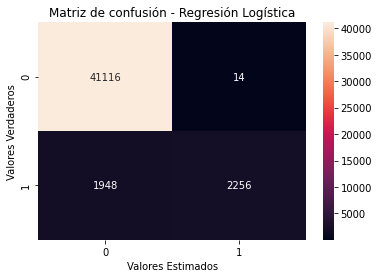

In [ ]:
## Modelo Supervisado

cm = confusion_matrix(y_test, logreg.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valores Estimados')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Regresión Logística')

Text(0.5, 1.0, 'Matriz de confusión - Isolation Forest')

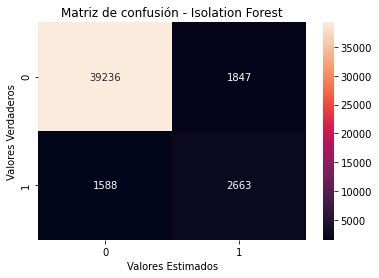

In [ ]:
## Modelo no Supervisado

cm = confusion_matrix(y_if_test, x_if_test[['resultado']])
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valores Estimados')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de confusión - Isolation Forest')

In [ ]:
## Modelo Supervisado

print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41130
           1       0.99      0.54      0.70      4204

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



In [ ]:
## Modelo no Supervisado

print(classification_report(y_if_test, x_if_test[['resultado']]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     41083
           1       0.59      0.63      0.61      4251

    accuracy                           0.92     45334
   macro avg       0.78      0.79      0.78     45334
weighted avg       0.93      0.92      0.93     45334



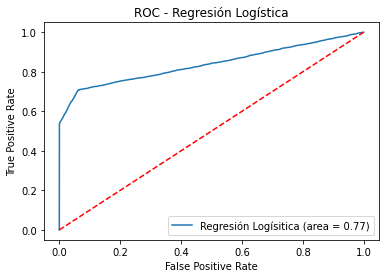

In [ ]:
## Modelo Supervisado

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logísitica (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

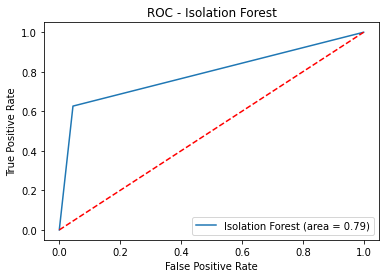

In [ ]:
## Modelo no Supervisado

logit_roc_auc = roc_auc_score(y_if_test, x_if_test[['resultado']])
fpr, tpr, thresholds = roc_curve(y_if_test, x_if_test[['resultado']])
plt.figure()
plt.plot(fpr, tpr, label='Isolation Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Isolation Forest')
plt.legend(loc='lower right')
plt.show()